# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = len(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 32
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

at 4042 found sign of type 2
at 21727 found sign of type 13
at 25892 found sign of type 18


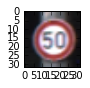

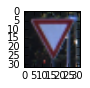

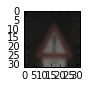

In [101]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random

random.seed(a=14213)

def plot_random_sign():
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()

    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap="gray")
    print("at %d found sign of type %d" % (index, y_train[index]))
    
# Plot three random signs 
plot_random_sign()
plot_random_sign()
plot_random_sign()

# We find a speed sign, priority sign and a warning sign.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

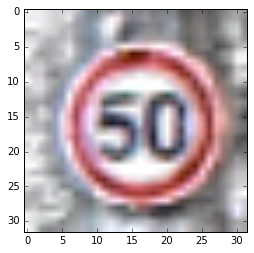

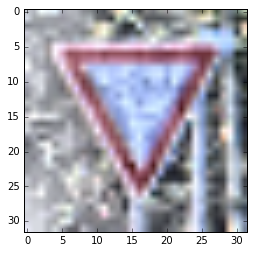

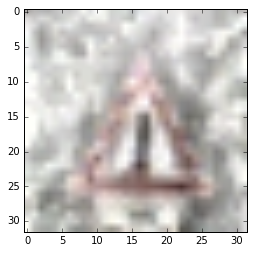

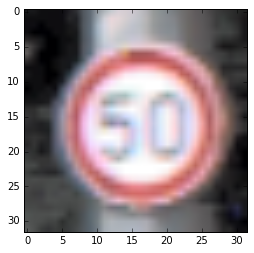

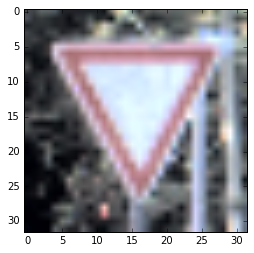

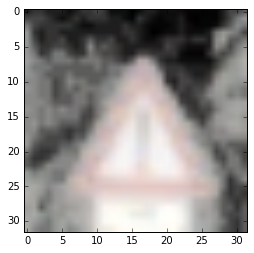

In [102]:
# Let us do illumination correction on the images. 
# We follow this post: http://stackoverflow.com/questions/24341114
import cv2

def normalize_illumination(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    #-----Applying CLAHE to L-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)

    #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    limg = cv2.merge((cl,a,b))

    #-----Converting image from LAB Color model to RGB model--------------------
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    
    return(final)

#
# Inspiration taken from: https://www.packtpub.com/mapt/book/Application-Development/9781785283932/2/ch02lvl1sec26/Enhancing%20the%20contrast%20in%20an%20image
#
def normalize_contrast(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    
    return(img_output)
    
# Let us inspect how illumination normalization with CLAHE looks on the images.
plt.figure(1)
plt.imshow(normalize_illumination(X_train[4042]))

plt.figure(2)
plt.imshow(normalize_illumination(X_train[21727]))

plt.figure(3)
plt.imshow(normalize_illumination(X_train[25892]))

plt.figure(4)
plt.imshow(normalize_contrast(X_train[4042]))

plt.figure(5)
plt.imshow(normalize_contrast(X_train[21727]))

plt.figure(6)
plt.imshow(normalize_contrast(X_train[25892]))

X_train_clahe = np.empty(X_train.shape)
for i in range(len(X_train)):
    X_train_clahe[i] = normalize_illumination(X_train[i])

X_test_clahe = np.empty(X_test.shape)
for i in range(len(X_test)):
    X_test_clahe[i] = normalize_illumination(X_test[i])
    
### Preprocess the data here.
### Feel free to use as many code cells as needed.

plt.show()

In [103]:
# Convert image to float.
X_float = np.empty(X_train.shape)
for i in range(len(X_train_clahe)):
    X_float[i] = img_as_float(X_train_clahe[i].astype(np.uint8))

    
# Let us inspect whether the data is centered.
for ch in range(3):
    print("for channel %s mean or clahe data: %s" %(
            ch, X_float[...,ch].mean()))
   
# Store the adjustments since we will need these to adjust any future input images.
mean_correction = list()
std_correction = list()
for ch in range(3):
    mean_correction.insert(ch, X_float[..., ch].mean())
    std_correction.insert(ch, X_float[..., ch].std())
    
# We see that the data is much less centered after applying CLAHE. We will recenter the data
# since CNN are very sensitive to data that is not centered.
X_norm = np.empty(X_float.shape)
X_test_norm = np.empty(X_test_clahe.shape)
for ch in range(3):
    X_norm[..., ch] = (X_float[..., ch] - mean_correction[ch])/ (std_correction[ch] + 1e-8)
    X_test_norm[..., ch] = ((img_as_float(X_test_clahe[..., ch].astype(np.uint8)) - mean_correction[ch]) /
                            (std_correction[ch] + 1e-8))
    

# Let us inspect our new mean.
for ch in range(3):
    print("for channel %s new mean for CLAHE data: %s new std: %s" % (
            ch, X_norm[...,ch].mean(), X_norm[...,ch].std()))
    

for channel 0 mean or clahe data: 0.667181595575
for channel 1 mean or clahe data: 0.638400326064
for channel 2 mean or clahe data: 0.650223840313
for channel 0 new mean for CLAHE data: 1.96347425667e-15 new std: 0.999999953922
for channel 1 new mean for CLAHE data: -6.67837727431e-15 new std: 0.999999954726
for channel 2 new mean for CLAHE data: -4.75572593794e-15 new std: 0.999999956834


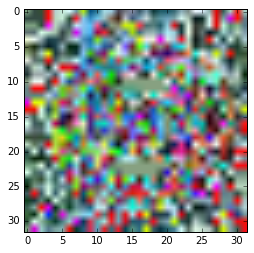

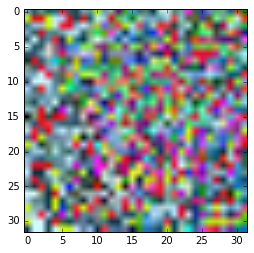

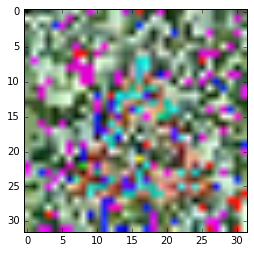

In [104]:
plt.figure(1)
plt.imshow(X_norm[4042])
plt.figure(2)
plt.imshow(X_norm[21727])
plt.figure(3)
plt.imshow(X_norm[25892])

plt.show()

### Question 1 


**Answer:** For the preparation of the input I looked a the orginal paper and researched the internet. In the original paper the authors discuss normalizing the contrast of the image. With some more research I found Contrast Limited Adaptive Histogram Equalization (CLAHE). I ran both methods for three random signs. Based on the output of both methods it seems that CLAHE is better at accentuating the features of the traffic signs. As a result I chose that method. I tried to add a Gaussian blur to prevent having too pixelated features in the images but this causes a significant deterioration of the image. As a result I prefer to keep the CLAHE images.

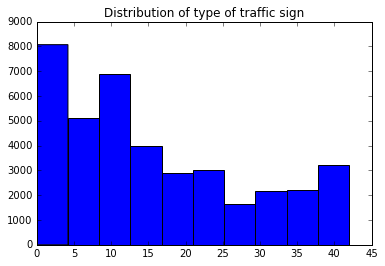

In [105]:
plt.hist(y_train)
plt.title('Distribution of type of traffic sign')

In [112]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

# Stratisfied sampler to ensure that every type of sign is represented equally in the 
# data that we will use to test the final model.
X_train_norm, X_validation_norm, y_train_, y_validation = train_test_split(X_norm, 
                                                                            y_train, 
                                                                            test_size=0.2, 
                                                                            random_state=42,
                                                                            stratify=y_train)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** First, we shuffle the data set to ensure that the order does not impact the training. Secondly, we hold out twenty percent of the training set for validation purposes. We do not take a fully random sample but instead we take a stratified sample since, as we can see from the histogram, the type of traffic signs are not equally distributed. This could cause a high error in the accuracy.

(12630, 32, 32, 3)

In [3]:
# Do a reset of the entire environment because some code above causes the data to be corrupt.
%reset
# I cannot seem to find what the cause is so just do a reset and take the essential bits 
# to do the training.
import tensorflow as tf
import tflearn
from tflearn.data_utils import to_categorical
from sklearn.model_selection import train_test_split
from skimage import img_as_float
import pickle
import numpy as np
import cv2

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = len(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

# Let us do illumination correction on the images.
# We follow this post: http://stackoverflow.com/questions/24341114
def normalize_illumination(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    #-----Applying CLAHE to L-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    limg = cv2.merge((cl,a,b))
    #-----Converting image from LAB Color model to RGB model--------------------
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return(final)

X_train_clahe = np.empty(X_train.shape)
for i in range(len(X_train)):
    X_train_clahe[i] = normalize_illumination(X_train[i])

X_test_clahe = np.empty(X_test.shape)
for i in range(len(X_test)):
    X_test_clahe[i] = normalize_illumination(X_test[i])

# Convert image to float.
X_float = np.empty(X_train.shape)
for i in range(len(X_train_clahe)):
    X_float[i] = img_as_float(X_train_clahe[i].astype(np.uint8))

mean_correction = list()
std_correction = list()
for ch in range(3):
    mean_correction.insert(ch, X_float[..., ch].mean())
    std_correction.insert(ch, X_float[..., ch].std())

# We see that the data is much less centered after applying CLAHE. We will recenter the data
# since CNN are very sensitive to data that is not centered.
X_norm = np.empty(X_float.shape)
X_test_norm = np.empty(X_test_clahe.shape)
for ch in range(3):
    X_norm[..., ch] = (X_float[..., ch] - mean_correction[ch])/ (std_correction[ch] + 1e-8)
    X_test_norm[..., ch] = ((img_as_float(X_test_clahe[..., ch].astype(np.uint8)) - mean_correction[ch]) /
                            (std_correction[ch] + 1e-8))

# Stratisfy by type of traffic sign.
X_input, X_validation_clahe, y_train, y_validation = train_test_split(X_norm,
                                                                      y_train,
                                                                      test_size=0.2,
                                                                      random_state=42,
                                                                      stratify=y_train)

# Perform one hot encoding.
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

# Define the network input.
network = tflearn.input_data(shape=[None, image_shape, image_shape, 3])

# First layer is a CNN with filter size 3 and depth 32 and relu activation.
network = tflearn.conv_2d(network, 32, 3, activation='relu')
# Maxpool with stride 2.
network = tflearn.max_pool_2d(network, 2)

# Third layer is a CNN with filter size 3 and depth 64 and relu activation.
network = tflearn.conv_2d(network, 64, 3, activation='relu')
# Third layer is a CNN with filter size 3 and depth 64 and relu activation.
network = tflearn.conv_2d(network, 64, 3, activation='relu')
# Maxpool with stride 2.
network = tflearn.max_pool_2d(network, 2)
# Fully connected layer with output size 512 and relu activation.
network = tflearn.fully_connected(network, 512, activation='relu')
# Dropout layer with 50% drop-out probability.
network = tflearn.dropout(network, 0.5)
# Fully connected layer with output size equal to 43, which is the number 
# of classes we train on and softmax activation to increase the distance
# between the logit scores.
network = tflearn.fully_connected(network, n_classes, activation='softmax')
# Regression layer that will help us tune the neural network. 
# Explanation of the parameter selection:
# * As an optimizer we select 'Adaptive Moment Estimation' (see https://arxiv.org/pdf/1412.6980.pdf)
#   this method has low memory requirements and only requires the first order derivatives
#   of the tensors. The latter requirement results in faster computations.
# * as learning_rate we set a low value to prevent the stochastic gradient descent algorithm
#   to jump too large distances at once.
# * as loss function we choose categorical_crossentropy since we seek to 
#   categorize images. The categorical cross entropy function will compute errors
#   in the categorization task.
network = tflearn.regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

# Train using classifier. We set the epochs at 50 to let the model stabilize. 
# We shuffle the data to ensure that the CNN does not train to local data
# attributes. Especially since the data is not evenly spread over 
# all classes local training could easily happen.
model = tflearn.DNN(network, tensorboard_verbose=2)
model.fit(X_input, y_train, n_epoch=20, shuffle=True,
          validation_set=(X_test_norm, y_test),
          show_metric=True, batch_size=120, run_id='traffic_cnn')
model.save('traffic_cnn.tflearn')

Training Step: 5239  | total loss: 0.46123 | time: 45.438s
| Adam | epoch: 020 | loss: 0.46123 - acc: 0.9794 -- iter: 31320/31367
Training Step: 5240  | total loss: 0.41565 | time: 47.137s
| Adam | epoch: 020 | loss: 0.41565 - acc: 0.9814 | val_loss: 0.11283 - val_acc: 0.9714 -- iter: 31367/31367
--
INFO:tensorflow:/home/ubuntu/CarND-Traffic-Sign-Classifier-Project/traffic_cnn.tflearn is not in all_model_checkpoint_paths. Manually adding it.


![performance first model](img/performance_first_model.png)

The first model yields a validation accuracy of 96%. The plot that we retrieved from tensorboard is shown above. This accuracy is good but there are models in literature that perform significantly better. If we look at our first model we see that each layer is not very deep. The next model is a single DNN from [a paper that uses a multi-column deep neural network](http://people.idsia.ch/~juergen/nn2012traffic.pdf) to classify the traffic signs. We are going to try to apply first one column. If that works we will try to build multiple columns next.

In [ ]:
%reset
# Load pickled data
import tensorflow as tf
import tflearn
from tflearn.data_utils import to_categorical

from sklearn.model_selection import train_test_split
from skimage import img_as_float
import pickle
import numpy as np
import cv2

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = len(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

# Let us do illumination correction on the images.
# We follow this post: http://stackoverflow.com/questions/24341114
def normalize_illumination(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    #-----Applying CLAHE to L-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    limg = cv2.merge((cl,a,b))
    #-----Converting image from LAB Color model to RGB model--------------------
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return(final)

X_train_clahe = np.empty(X_train.shape)
for i in range(len(X_train)):
    X_train_clahe[i] = normalize_illumination(X_train[i])

X_test_clahe = np.empty(X_test.shape)
for i in range(len(X_test)):
    X_test_clahe[i] = normalize_illumination(X_test[i])

# Convert image to float.
X_float = np.empty(X_train.shape)
for i in range(len(X_train_clahe)):
    X_float[i] = img_as_float(X_train_clahe[i].astype(np.uint8))

mean_correction = list()
std_correction = list()
for ch in range(3):
    mean_correction.insert(ch, X_float[..., ch].mean())
    std_correction.insert(ch, X_float[..., ch].std())

# We see that the data is much less centered after applying CLAHE. We will recenter the data
# since CNN are very sensitive to data that is not centered.
X_norm = np.empty(X_float.shape)
X_test_norm = np.empty(X_test_clahe.shape)
for ch in range(3):
    X_norm[..., ch] = (X_float[..., ch] - mean_correction[ch])/ (std_correction[ch] + 1e-8)
    X_test_norm[..., ch] = ((img_as_float(X_test_clahe[..., ch].astype(np.uint8)) - mean_correction[ch]) /
                            (std_correction[ch] + 1e-8))

# TODO: change to stratisfied sampler to ensure that
X_input, X_validation_clahe, y_train, y_validation = train_test_split(X_norm,
                                                                      y_train,
                                                                      test_size=0.2,
                                                                      random_state=42,
                                                                      stratify=y_train)

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

network = tflearn.input_data(shape=[None, image_shape, image_shape, 3])

# First layer is a convolution with filter size 32 and relu activation.
network = tflearn.conv_2d(network, 32, 3, activation='relu')
# Second layer is convolution with filter size of 7 and 100 depth.
network = tflearn.conv_2d(network, 100, 7, activation='relu')
# Maxpool with stride 2.
network = tflearn.max_pool_2d(network, 2)
# Fourth layer is convolution with filter size 4 and 150 depth and relu activation.
network = tflearn.conv_2d(network, 150, 4, activation='relu')
# Fifth layer is max pool with stride 2.
network = tflearn.max_pool_2d(network, 2)
# Sixth layer is convolution with filter size 4 and 250 depth and relu activation.
network = tflearn.conv_2d(network, 250, 4, activation='relu')
# Seventh layer is max pool with stride 2.
network = tflearn.max_pool_2d(network, 2)
# We include dropout layer with 50% drop-out probability.
network = tflearn.dropout(network, 0.5)
# Ninth layer is fully connected.
network = tflearn.fully_connected(network, 300, activation='relu')
# Fully connected layer with output size equal to 43, which is the number
# of classes we train on and softmax activation to increase the distance
# between the logit scores.
network = tflearn.fully_connected(network, n_classes, activation='softmax')

# Regression layer that will help us tune the neural network.
# Explanation of the parameter selection:
# * As an optimizer we select 'Adaptive Moment Estimation' (see https://arxiv.org/pdf/1412.6980.pdf)
#   this method has low memory requirements and only requires the first order derivatives
#   of the tensors. The latter requirement results in faster computations.
# * as learning_rate we set a low value to prevent the stochastic gradient descent algorithm
#   to jump too large distances at once.
# * as loss function we choose categorical_crossentropy since we seek to
#   categorize images. The categorical cross entropy function will compute errors
#   in the categorization task.
network = tflearn.regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)
# Train using classifier
model = tflearn.DNN(network, tensorboard_verbose=2,tensorboard_dir='/tmp/tflearn_logs/')

print("About to start 🤖 learning")
model.fit(X_input, y_train, n_epoch=50, shuffle=True,
          validation_set=(X_test_norm, y_test),
          show_metric=True, batch_size=240, run_id='traffic_cnn2')
model.save('traffic_cnn2.tflearn')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 32
Number of classes = 43
About to start 🤖 learning
---------------------------------
Run id: traffic_cnn2
Log directory: /tmp/tflearn_logs/
INFO:tensorflow:Summary name Accuracy/ (raw) is illegal; using Accuracy/__raw_ instead.
---------------------------------
Training samples: 31367
Validation samples: 12630
--


Our initial CNN is 8 layers deep and each layer had a depth of at most 64. The performance of that CNN was about 96% on the validation set. Our single column of a MDNN is 10 layers deep and has a depth of maximum 300. Although the training takes much more time the accuracy remains around 96%. This shows us that increase the depth of a layer does not directly lead to a higher performance. Next we will explore wether creating a very deep CNN will increase the performance. For this we will use a [highway network](https://arxiv.org/pdf/1507.06228v2.pdf) initially proposed in [this paper](https://arxiv.org/pdf/1505.00387v2.pdf).

The benefit of a highway network is that it permits to train very deep networks efficiently. Using tensorboard we visualize a highway layer from the code below. The graphical representation is as follows:

![performance first model](img/highway_layer.png)

Mathematically we can describe our highway layer as follows,
$$
\mathbf{y}=H(\mathbf{x},\mathbf{W_H})\cdot T(\mathbf{x},\mathbf{W_T})+\mathbf{x}\cdot C(\mathbf{x},\mathbf{W_C})
$$
where we omit the biases and,

 * $H()$ is a convolutional layer,
 * $T()$ is a transform gate or activation layer, which we chose to be a sigmoid,
 * $C()$ is a carry gate which we chose to be ReLU.
 


In [5]:
%reset
# Load pickled data                                                                                                                                                                                         
import tensorflow as tf                                                                                                                                                                                     
import tflearn                                                                                                                                                                                              
from tflearn.data_utils import to_categorical                                                                                                                                                               
                                                                                                                                                                                                            
from sklearn.model_selection import train_test_split                                                                                                                                                        
from skimage import img_as_float                                                                                                                                                                            
import pickle                                                                                                                                                                                               
import numpy as np                                                                                                                                                                                          
import cv2                                                                                                                                                                                                  
                                                                                                                                                                                                            
training_file = 'train.p'                                                                                                                                                                                   
testing_file = 'test.p'                                                                                                                                                                                     
                                                                                                                                                                                                            
with open(training_file, mode='rb') as f:                                                                                                                                                                   
    train = pickle.load(f)                                                                                                                                                                                  
with open(testing_file, mode='rb') as f:                                                                                                                                                                    
    test = pickle.load(f)                                                                                                                                                                                   
                                                                                                                                                                                                            
X_train, y_train = train['features'], train['labels']                                                                                                                                                       
X_test, y_test = test['features'], test['labels']                                                                                                                                                           
                                                                                                                                                                                                            
# TODO: Number of training examples                                                                                                                                                                         
n_train = len(X_train)                                                                                                                                                                                      
                                                                                                                                                                                                            
# TODO: Number of testing examples.                                                                                                                                                                         
n_test = len(X_test)                                                                                                                                                                                        
                                                                                                                                                                                                            
# TODO: What's the shape of an traffic sign image?                                                                                                                                                          
image_shape = len(X_train[0])                                                                                                                                                                               
                                                                                                                                                                                                            
# TODO: How many unique classes/labels there are in the dataset.                                                                                                                                            
n_classes = len(np.unique(y_train))                                                                                                                                                                         
                                                                                                                                                                                                            
print("Number of training examples =", n_train)                                                                                                                                                             
print("Number of testing examples =", n_test)                                                                                                                                                               
print("Image data shape =", image_shape)                                                                                                                                                                    
print("Number of classes =", n_classes)                                                                                                                                                                     
                                                                                                                                                                                                            
# Let us do illumination correction on the images.                                                                                                                                                          
# We follow this post: http://stackoverflow.com/questions/24341114                                                                                                                                          
def normalize_illumination(img):                                                                                                                                                                            
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)                                                                                                                                                              
    l, a, b = cv2.split(lab)                                                                                                                                                                                
    #-----Applying CLAHE to L-channel-------------------------------------------                                                                                                                            
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))                                                                                                                                              
    cl = clahe.apply(l)                                                                                                                                                                                     
    #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
        #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------                                                                                                                            
    limg = cv2.merge((cl,a,b))                                                                                                                                                                              
    #-----Converting image from LAB Color model to RGB model--------------------                                                                                                                            
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)                                                                                                                                                           
    return(final)                                                                                                                                                                                           
                                                                                                                                                                                                            
X_train_clahe = np.empty(X_train.shape)                                                                                                                                                                     
for i in range(len(X_train)):                                                                                                                                                                               
    X_train_clahe[i] = normalize_illumination(X_train[i])                                                                                                                                                   
                                                                                                                                                                                                            
X_test_clahe = np.empty(X_test.shape)                                                                                                                                                                       
for i in range(len(X_test)):                                                                                                                                                                                
    X_test_clahe[i] = normalize_illumination(X_test[i])                                                                                                                                                     
                                                                                                                                                                                                            
# Convert image to float.                                                                                                                                                                                   
X_float = np.empty(X_train.shape)                                                                                                                                                                           
for i in range(len(X_train_clahe)):                                                                                                                                                                         
    X_float[i] = img_as_float(X_train_clahe[i].astype(np.uint8))                                                                                                                                            
                                                                                                                                                                                                            
mean_correction = list()                                                                                                                                                                                    
std_correction = list()                                                                                                                                                                                     
for ch in range(3):                                                                                                                                                                                         
    mean_correction.insert(ch, X_float[..., ch].mean())                                                                                                                                                     
    std_correction.insert(ch, X_float[..., ch].std())                                                                                                                                                       
                                                                                                                                                                                                            
# We see that the data is much less centered after applying CLAHE. We will recenter the data                                                                                                                
# since CNN are very sensitive to data that is not centered.                                                                                                                                                
X_norm = np.empty(X_float.shape)                                                                                                                                                                            
X_test_norm = np.empty(X_test_clahe.shape)                                                                                                                                                                  
for ch in range(3):                                                                                                                                                                                         
    X_norm[..., ch] = (X_float[..., ch] - mean_correction[ch])/ (std_correction[ch] + 1e-8)                                                                                                                 
    X_test_norm[..., ch] = ((img_as_float(X_test_clahe[..., ch].astype(np.uint8)) - mean_correction[ch]) /                                                                                                  
                            (std_correction[ch] + 1e-8))                                                                                                                                                    
                                                                                                                                                                                                            
# TODO: change to stratisfied sampler to ensure that                                                                                                                                                        
X_input, X_validation_clahe, y_train, y_validation = train_test_split(X_norm,                                                                                                                               
                                                                      y_train,                                                                                                                              
                                                                      test_size=0.2,                                                                                                                        
                                                                      random_state=42,                                                                                                                      
                                                                      stratify=y_train)                                                                                                                     
                                                                                                                                                                                                            
y_train = to_categorical(y_train, n_classes)                                                                                                                                                                
y_test = to_categorical(y_test, n_classes)                                                                                                                                                                  
                                                                                                                                                                                                            
network = tflearn.input_data(shape=[None, image_shape, image_shape, 3])                                                                                                                                     
                                                                                                                                                                                                            
for i in range(3):                               
    for j in [3, 2, 1]:                                                                                                                                                                                     
        network = tflearn.highway_conv_2d(network, 16, j, activation='elu')                                                                                                                                 
    network = tflearn.max_pool_2d(network, 2)                                                                                                                                                               
    network = tflearn.batch_normalization(network)                                                                                                                                                          
                                                                                                                                                                                                            
network = tflearn.fully_connected(network, 128, activation='relu')                                                                                                                                          
network = tflearn.fully_connected(network, 256, activation='relu')                                                                                                                                          
# Fully connected layer with output size equal to 43, which is the number                                                                                                                                   
# of classes we train on and softmax activation to increase the distance                                                                                                                                    
# between the logit scores.                                                                                                                                                                                 
network = tflearn.fully_connected(network, n_classes, activation='softmax')                                                                                                                                 
                                                                                                                                                                                                            
# Regression layer that will help us tune the neural network.                                                                                                                                               
# Explanation of the parameter selection:                                                                                                                                                                   
# * As an optimizer we select 'Adaptive Moment Estimation' (see https://arxiv.org/pdf/1412.6980.pdf)                                                                                                        
#   this method has low memory requirements and only requires the first order derivatives                                                                                                                   
#   of the tensors. The latter requirement results in faster computations.                                                                                                                                  
# * as learning_rate we set a low value to prevent the stochastic gradient descent algorithm                                                                                                                
#   to jump too large distances at once.                                                                                                                                                                    
# * as loss function we choose categorical_crossentropy since we seek to                                                                                                                                    
#   categorize images. The categorical cross entropy function will compute errors                                                                                                                           
#   in the categorization task.                                                                                                                                                                             
network = tflearn.regression(network, optimizer='adam',                                                                                                                                                     
                     loss='categorical_crossentropy',                                                                                                                                                       
                     learning_rate=0.001)                                                                                                                                                                   
# Train using classifier                                                                                                                                                                                    
model = tflearn.DNN(network, tensorboard_verbose=2,tensorboard_dir='/tmp/tflearn_logs/')                                                                                                                    
                                                                                                                                                                                                            
model.fit(X_input, y_train, n_epoch=20, shuffle=True,                                                                                                                                                       
          validation_set=(X_test_norm, y_test),                                                                                                                                                             
          show_metric=True, batch_size=100, run_id='traffic_highway') 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 32
Number of classes = 43


IndexError: list index out of range

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.